<a href="https://colab.research.google.com/github/batahualpa11/ML_Projects/blob/main/data_science_try_on.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instructions

Welcome to the data science "try-on" exercise. To get started, **make a copy of this file**.

This repository represents a small data science project that aims to predict the price of an apartment in Singapore based on a collection of independent variables. We will particularly be focusing on the age of a house, as well as its distance to the closest [MRT station](https://en.wikipedia.org/wiki/List_of_Singapore_MRT_stations), and how these two variables influence the price of an apartment.

Within this project, you will complete two sections where you will fill in code and note observations on your datasets. Look to the comments that start with "TODO" to determine which lines of code you need to change to complete this project.

As you run your code blocks, be sure to answer the text blocks that are labeled as "Question #." Be sure to provide sufficient detail when answering these questions. Even if you are unsure which terminology to use, give it your best effort!

This repository is an example of a typical data analytics process where you are aiming to find interesting trends and patterns in order to help your organization make effective and data-driven next actions.

For a more in-depth explanation of how you will complete this project, check out this screen recording: https://www.loom.com/share/4294c2dcb5174d1a86d08603347294d4?sid=081a688f-c611-403a-9347-651698718792


# Section 1 : Explore

Within this section, we will take a look at the characteristics of the dataset to discover interesting trends and patterns.

We want to discover which variables accurately predict the price of a rental property.

In [ ]:
# import required modules for this project

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# TODO: Remove the "#" at the start of the line of code below and run this code block!
#df = pd.read_csv("https://raw.githubusercontent.com/F-said/data-science-try-on/refs/heads/main/data/realestate.csv")

In [ ]:
# print out the first 5 rows of this dataset
df.head()

,house age,distance_to_mrt,num_convenience_stores,price_per_unit_area,num_of_rooms,pet_friendly
0,19.5,306.5947,9.0,42.2,2,No
1,13.3,561.9845,5.0,47.3,2,No
2,13.3,561.9845,5.0,54.8,4,No
3,5.0,390.5684,5.0,43.1,3,No
4,7.1,2175.0300,3.0,32.1,3,Yes


In [ ]:
# print out the summary statistics (mean, median, max, min, count) of all numeric columns
df.describe()

,house age,distance_to_mrt,num_convenience_stores,price_per_unit_area,num_of_rooms
count,334.000000,334.000000,334.000000,334.000000,334.000000
mean,17.533234,812.824629,4.880240,40.295509,2.814371
std,11.775630,984.274974,2.552282,12.756827,1.513196
min,0.000000,23.382840,1.000000,7.600000,1.000000
25%,7.800000,279.172600,3.000000,31.100000,1.250000
50%,15.600000,443.967700,5.000000,40.300000,3.000000
75%,29.250000,967.400000,7.000000,47.850000,4.000000
max,43.800000,6488.021000,10.000000,117.500000,6.000000


# Univariate Exploratory Analysis

Let's explore the distribution of single variables in this dataset.

In [ ]:
# Explore the distribution of apartment prices
# TODO: Remove the "#" at the start of the line of code below and run this code block!

#df["price_per_unit_area"].plot.hist()

<Axes: ylabel='Frequency'>

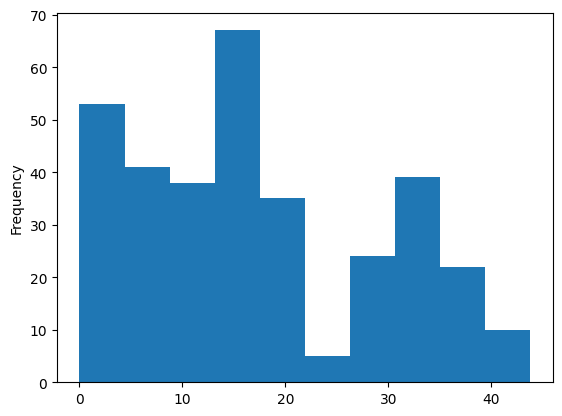

In [ ]:
# Explore the distribution of house age
# TODO: currently we are missing the column name in our code below: replace the "..." with "house age" in the code below

df["..."].plot.hist()

<Axes: ylabel='Frequency'>

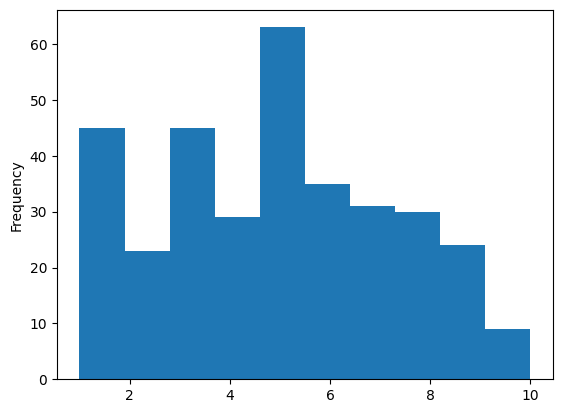

In [ ]:
# Explore the distribution of the number of convenience stores around apartments
# TODO: currently we are missing the column name in our code below: replace the "..." with "num_convenience_stores" in the code below

df["..."].plot.hist()

## Question 1

When observing our histograms, we are particularly looking for a [normal distribution](https://www.investopedia.com/terms/n/normaldistribution.asp), which appears as a "bell curve" with a peaked middle and flat tails. Take a look at the three distributions you've created above. Do any of these visualizations appear to **not** be a normal distribution? If so, which ones are they? How is their shape different from our normal distribution? Write your answers below.

[Answer here]

# Bivariate Exploratory Analysis

Let's explore the relationship of multiple variables in this dataset.

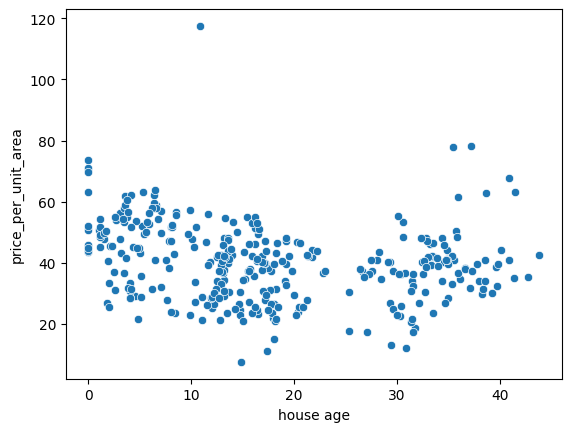

In [ ]:
# scatter plot of house age & price of unit area

sns.scatterplot(data=df, x="house age", y="price_per_unit_area")
plt.show()

## Question 2

Does there seem to be a trend in the scatter plot above? Is this trend positive (going up), negative (going down), or something else? What does this trend say about the relationship between house age and price? Write your answers below.

[Answer here]

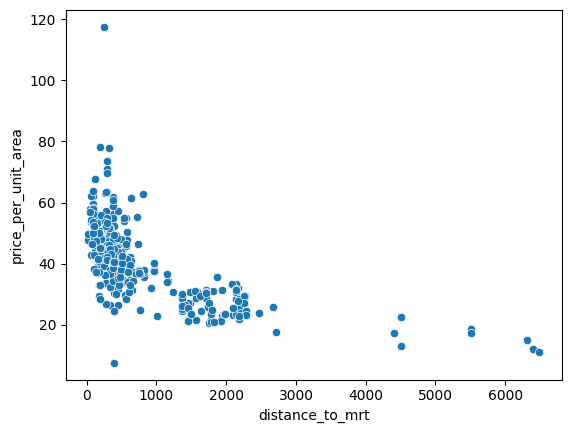

In [ ]:
# scatter plot of "num_convenience_stores" and "price_per_unit_area"
# TODO:  currently we are missing the column names in our code below: replace the first "..." with "distance_to_mrt"
# and the second "..." with "price_per_unit_area" in the code below

sns.scatterplot(data=df, x="...", y="...")
plt.show()

## Question 3

Does there seem to be a trend in the scatter plot above? Is this trend positive (going up), negative (going down), or something else? What does this trend say about the relationship between the distance to the closest mrt station (metro station) and house price? Write your answers below.

[Answer here]

# Section 2 : Linear Regression

To predict our rental housing prices, we will begin with a linear regression model. To find out more about the maths behind regression, check out the [following article](https://onlinestatbook.com/2/regression/regression.html).

In [ ]:
"""
A simple linear regression model with all predictors and target variable of
price of unit area.
"""

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Model 1

First we will predict the price of an apartment using its age. Run all the code-blocks below and answer each question.

In [ ]:
# split data into "X" and "y" set
X = df[["house age"]]
y = df["price_per_unit_area"]

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

#  split your data into a training and testing set, with 25% of data in the test set
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.25)

In [ ]:
# make linear regression object
reg = LinearRegression()

# fit model to data
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
# generate predictions on X_test
y_pred = reg.predict(X_test)

# score MSE
mse = mean_squared_error(y_test, y_pred)
print("MSE of price_per_unit_area:", mse)

MSE of price_per_unit_area: 113.11429104501327


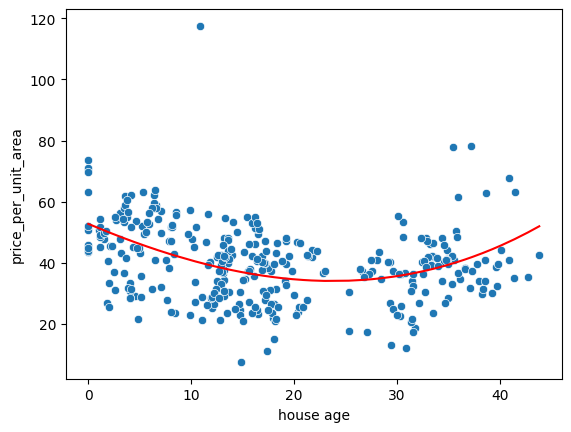

In [ ]:
# view accuracy of developed model
predictions = reg.predict(poly.fit_transform(X))

# scatter plot of house age & price of unit area
sns.scatterplot(data=df, x="house age", y="price_per_unit_area")
sns.lineplot(x=X.iloc[:, 0], y=predictions, color="r")
plt.show()

## Question 1

Does it seem like the red line in the scatter plot above "fits" our scatter plot well? That is, does it seem like the red line describes the direction of the data? What is this direction? Is it going up, or down, or does it take another non-linear pattern? Write your answers below.

[Answer here]

# Model 2

Next we will attempt to predict the price of a house using its distance to the closest MRT station.

In [ ]:
# split data into "X" and "y" set
X = df[["distance_to_mrt"]]
y = df["price_per_unit_area"]

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

#  split your data into a training and testing set, with 25% of data in the test set
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.25)

In [ ]:
# make linear regression object
reg = LinearRegression()

# fit model to data
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
# generate predictions on X_test
y_pred = reg.predict(X_test)

# score MSE
mse = mean_squared_error(y_test, y_pred)
print("MSE of distance_to_mrt:", mse)

MSE of distance_to_mrt: 48.78404804138792


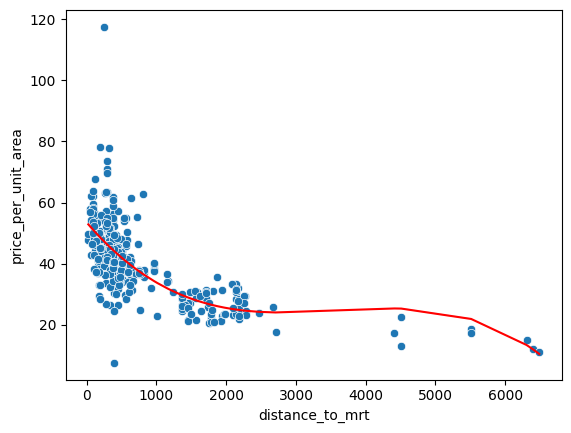

In [ ]:
# view accuracy of developed model
predictions = reg.predict(poly.fit_transform(X))

# scatter plot of house age & price of unit area
sns.scatterplot(data=df, x="distance_to_mrt", y="price_per_unit_area")
sns.lineplot(x=X.iloc[:, 0], y=predictions, color="r")
plt.show()

## Question 2

Does it seem like the red line in the scatter plot above "fits" our scatter plot well? That is, does it seem like the red line describes the direction of the data? What is this direction? Is it going up, or down, or does it take some other non-linear pattern? Write your answers below.

[Answer here]

## Question 3

Let's say you are working as a data analyst at a company that specializes in providing tailored recommendations for people looking for apartments. If someone wanted to find the cheapest possible apartment, which house age and distance to closest mrt station should they prioritize? Take a look a the trend lines that you've plotted to motivate your answers.

[Answer here]

# Done

Congratulations on completing your (potentially) first data science project. To find out more about what data-scientists/analysts do, check out these videos

* [The NBA Data Scientist](https://www.youtube.com/watch?v=MpLHMKTolVw&ab_channel=BloombergOriginals)
* [Why this black hole photo is such a big deal](https://youtu.be/pAoEHR4aW8I)
* [Andrew Ng - Machine Learning Introduction](https://www.youtube.com/watch?v=gb262LDH1So&list=PLiPvV5TNogxIS4bHQVW4pMkj4CHA8COdX&ab_channel=BlitzKim)